<h1 align="center" style="margin-top:10px">Model and variable selection.</h1>
<h2 align="center" style="margin-top:10px">And a little bit about regularization.</h2>
<h3 align="center" style="margin-top:10px">And a little bit about KNN.</h3>
<h4 align="center" style="margin-top:10px">And a little more about MARS.</h4>

## Bias Variance Tradeoff

Prediction errors can be decomposed into two main subcomponents of interest: error from bias, and error from variance. The tradeoff between a model's ability to minimize bias and variance is foundational to training machine learning models, so it's worth taking the time to understand the concept.

Using our wildest imagination, we can picture a dataset consisting of features X and labels Y, as on the left. Also imagine that we’d like to generalize this relationship to additional values of X - that we’d like to predict future values based on what we’ve already seen before. 

With our imagination now undoubtedly spent, we can take a very simple approach to modeling the relationship between X and Y by just drawing a line to the general trend of the data.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic7.png?raw=true:, width=800" alt="My Image" width=800>

Our simple model isn’t the best at modeling the relationship - clearly there's information in the data that it's failing to capture. 

We'll measure the performance of our model by looking at the mean-squared error of its output and the true values (displayed in the bottom barchart). Our model is close to some of the training points, but overall there's definitely room for improvement. 

The error on the training data is important for model tuning, but what we really care about is how it performs on data we haven't seen before, called test data. So let's check that out as well.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic8.png?raw=true:, width=800" alt="My Image" width=800>

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic9.png?raw=true:, width=800" alt="My Image" width=800>

Uh-oh, it looks like our earlier suspicions were correct - our model is garbage. The test error is even higher than the train error! 

In this case, we say that our model is underfitting the data: our model is so simple that it fails to adequately capture the relationships in the data. The high test error is a direct result of the lack of complexity of our model. 

An underfit model is one that is too simple to accurately capture the relationships between its features X and label Y.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic10.png?raw=true:, width=800" alt="My Image" width=800>

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic11.png?raw=true:, width=800" alt="My Image" width=800>

Our previous model performed poorly because it was too simple. Let's try our luck with something more complex. In fact, let's get as complex as we can - let's train a model that predicts every point in our training data perfectly. 

Great! Now our training error is zero.

Wait a second... Even though our training error from our model was effectively zero, the error on our test data is high. What gives? 

Unsurprisingly, our model is too complicated. We say that it overfits the data. Instead of learning the true trends underlying our dataset, it memorized noise and, as a result, the model is not generalizable to datasets beyond its training data. 

Overfitting refers to the case when a model is so specific to the data on which it was trained that it is no longer applicable to different datasets.

In situations where your training error is low but your test error is high, you've likely overfit your model.

#### **Test error decomposition**
Our test error can come as a result of both under- and over- fitting our data, but how do the two relate to each other? 

In the general case, mean-squared error can be decomposed into three components: error due to bias, error to to variance, and error due to noise. 


\begin{align}
        Error = Bias^2 + Variance+ Noise 
    \end{align}

We can't affect the noise, but we can affect Bias and Variance

Bias represents the difference between the average prediction and the true value. We can think of the bias as measuring a systematic error in prediction. For underfit (low-complexity) models, the majority of our error comes from bias.



As with bias, the notion of variance also relates to different realizations of our model. Specifically, variance measures how much, on average, predictions vary for a given data point. Predictions from overfit (high-complexity) models show a lot more error from variance than from bias.

To obtain our best results, we should work to find a happy medium between a model that is so basic it fails to learn meaningful patterns in our data, and one that is so complex it fails to generalize to unseen data . 
By trading some bias for variance (i.e. increasing the complexity of our model), and without going overboard, we can find a balanced model for our dataset.

Repeating this aggregation across our range of model complexities, we can see the relationship between bias and variance in prediction errors manifests itself as a U-shaped curve detailing the trade off between bias and variance. 

When a model is too simple (i.e. small values along the x-axis), it ignores useful information, and the error is composed mostly of that from bias. 

When a model is too complex (i.e. large values along the x-axis), it memorizes non-general patterns, and the error is composed mostly of that from variance. 

The ideal model aims to minimize both bias and variance. It lays in the sweet spot - not too simple, nor too complex. Achieving such a balance will yield the minimum error.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic12.png?raw=true:, width=800" alt="My Image" width=800>

The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and Ridge regression. Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution. Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic13.png?raw=true:, width=800" alt="My Image" width=800>

* [If you want to deep dive in math](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html)
* [More interactive](https://mlu-explain.github.io/bias-variance/)

## Train, Test, Validation

Suppose we want to create a model that distinguishes cats from dogs. Each pet in our dataset has two features: weight and fluffiness.

The first step in our classification task is to randomly split our pets into three independent sets: 

* Training Set: The dataset that we feed our model to learn potential underlying patterns and relationships.

* Validation Set: The dataset that we use to understand our model's performance across different model types and hyperparameter choices.

* Test Set: The dataset that we use to approximate our model's unbiased accuracy in the wild.

#### **Train**
The training set is the dataset that we employ to train our model. It is this dataset that our model uses to learn any underlying patterns or relationships that will enable making predictions later on. 

The training set should be as representative as possible of the population that we are trying to model. Additionally, we need to be careful and ensure that it is as unbiased as possible, as any bias at this stage may be propagated downstream during inference.

#### **Validation**
We can build four different models (one for each feature possibility), how do we decide which model to select? 

We could compare the accuracy of each model on the training set, but if we use the same exact dataset for both training and tuning, the model will overfit and won't generalize well.

This is where the validation set comes in — it acts as an independent, unbiased dataset for comparing the performance of different algorithms trained on our training set. 

#### **Test**
Once we have used the validation set to determine the algorithm and parameter choices that we would like to use in production, the test set is used to approximate the models's true performance in the wild. It is the final step in evaluating our model's performance on unseen data. 

We should never, under any circumstance, look at the test set's performance before selecting a model. 

Peeking at our test set performance ahead of time is a form of overfitting, and will likely lead to unreliable performance expectations in production. It should only be checked as the final form of evaluation, after the validation set has been used to identify the best model.

***An important note.*** The distribution in your data may change over time. So a model that showed good accuracy on test data until recently may degrade.

The predictions are only right if the data submitted to the model in production mimics (or statistically equivalent?) the data used in training. What if it doesn’t? It called a data drift.

[More](https://www.evidentlyai.com/blog/machine-learning-monitoring-data-and-concept-drift)

## Cross-Validation

The Validation Set Approach is still widely used, especially when resource constraints prohibit alternatives that require resampling (like cross validation). But it's not perfect! The obvious issue is that our estimate of the test error can be highly variable depending on which particular observations are included in the training set and which are included in the validation set. That is, how do we know that the 30% we selected is the best way to split the data? What if we'd used a different split instead? Another issue is that this approach tends to overestimate the test error for models fit on our entire dataset. This is because more training data usually means better accuracy, but the validation set approach reserves a decent-sized chunk of data for validation and testing (and not training).

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic14.png?raw=true:, width=800" alt="My Image" width=800>

Rather than worrying about which split of data to use for training versus validation, we'll use them all in turn. Our strategy will be to iteratively use different portions of our data to train and validate our model. The exact process is actually quite simple: We'll randomly split our dataset into k sets, or folds, of equal size. One fold will be reserved as the validation set (or "hold-out set") and the remaining k−1 folds will be used as the training set. The training set will fit our model's parameters, and the validation set will be used for evaluation. This process will be repeated on our data k times, using a different fold for the validation set at each iteration. At the end of the procedure, we'll take the average of the validation sets' scores and use it as our model's estimated performance. This process is known as K-Fold Cross-Validation, and requires re-fitting our model k times (once for each fold).

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic15.png?raw=true:, width=800" alt="My Image" width=800>

If you think this looks familiar, you're on the right track! It's just the validation set applied k times - only using different splits of training/validation data each time. But this simple extension to the validation approach is very effective at overcoming its shortcomings. The main benefit is that, because we train our model on multiple subsets of our data and take the average of the evaluation scores on those subsets, our evaluation estimates from K-Fold Cross-Validation will have lower variance than will the evaluation estimates from the validation set approach. Additionally, K-Fold Cross-Validation looks at more data during training. In the validation set approach, only one sample of the data is used for the training set, and it's possible that some information just wasn't included in that sample. With K-Fold Cross-Validation, the whole ensemble uses all of the data, so every data point will get included in the training of a model, and the evaluation of that model will then be factored into the final evaluation estimate. Finally, it's worth stating the obvious fact that test error estimates are more accurate when more data is used in the training set. Even for modest values of k in K-Fold Cross-Validation (e.g. k=5), the training set comprises 80 percent of our data, so the approach typically doesn't overestimate the test error as much as the validation set approach could for small training set sizes. 

As a rule, we choose ***k=5 or 10***, because the training sample becomes large enough, and on the other hand we do not need to build very many models.

* [More](https://mlu-explain.github.io/cross-validation/)
* [In sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

# Practice

In [ ]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # this is to clear the warnings from this page, usually we should leave them on

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

## Credit Card Data

We will again work with the <TT>Credit</TT> dataset. The objective is to predict the average monthly credit card balance of customers based on predictors such as income, age, education, and credit rating. The dataset records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating.

We start by loading and viewing the data.

In [ ]:
data=pd.read_csv('Credit.csv', index_col='Obs')
data.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279


**We split data on train and test, but train also contains data for validation.**

We take the data in random order, because the shuffle parameter is True by default. 
* [Train test split docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Why we use method copy](https://docs.python.org/3/library/copy.html)

In [ ]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, random_state=1)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()

## Exploratory Data Analysis

We start by computing the descriptive statistics and pairwise correlations for the numerical variables.

The count row in the first table shows the number available observations for each variable. In this case all variables have the same count, reassuring us that there are no missing values.  The response has a large standard deviation relative to the mean: we should keep the magnitudes in mind when discussing coefficient sizes and prediction errors.  The first quartile of the response is zero, indicating that substantial fraction of the credit card customers have zero or low balance. 

In [ ]:
train.describe().round(1) # rounding the table to one decimal digit

,Income,Limit,Rating,Cards,Age,Education,Balance
count,280.0,280.0,280.0,280.0,280.0,280.0,280.0
mean,44.7,4690.0,352.0,3.0,55.4,13.5,509.3
std,34.6,2250.3,151.9,1.4,17.9,3.1,454.2
min,10.4,855.0,103.0,1.0,23.0,5.0,0.0
25%,21.0,3072.0,241.2,2.0,40.0,11.0,51.5
50%,33.1,4654.0,343.0,3.0,56.0,14.0,453.5
75%,55.4,5833.5,435.5,4.0,70.2,16.0,843.8
max,186.6,13913.0,982.0,9.0,98.0,20.0,1999.0


The pairwise correlations reveal that the predictors that are most correlated with the response are limit, rating, and income. The remaining predictors have very low correlation with credit card balances. Another important finding is that limit and rating have nearly perfect positive correlation and are therefore redudant predictors. Also note that income is highly correlated with limit and rating. Limit seems to be the key linear predictor of the response. 

In [ ]:
train.corr().round(2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.00,0.79,0.78,0.01,0.16,0.01,0.46
Limit,0.79,1.00,1.00,0.03,0.12,0.01,0.87
Rating,0.78,1.00,1.00,0.08,0.12,0.01,0.87
Cards,0.01,0.03,0.08,1.00,0.04,-0.02,0.11
Age,0.16,0.12,0.12,0.04,1.00,0.03,0.03
Education,0.01,0.01,0.01,-0.02,0.03,1.00,0.03
Balance,0.46,0.87,0.87,0.11,0.03,0.03,1.00


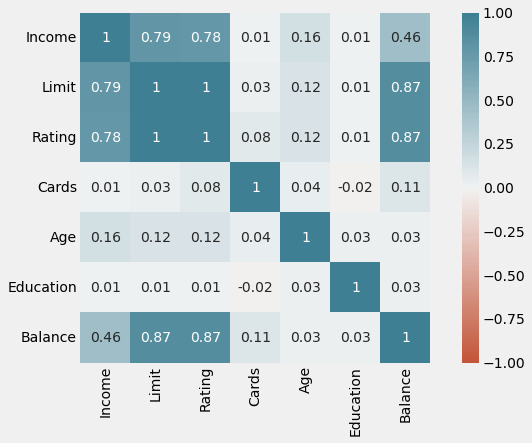

In [ ]:
sns.heatmap(train.corr().round(2), vmin=-1,vmax=1,center = 0,cmap = sns.diverging_palette(20,220,n=200), square=True,annot = True)

We now investigate the (unconditional) distribution of the response by plotting a histogram. We find that the response has a pronouncedly right skewed distribution. A substantial number of customers have zero or low credit card balance. 

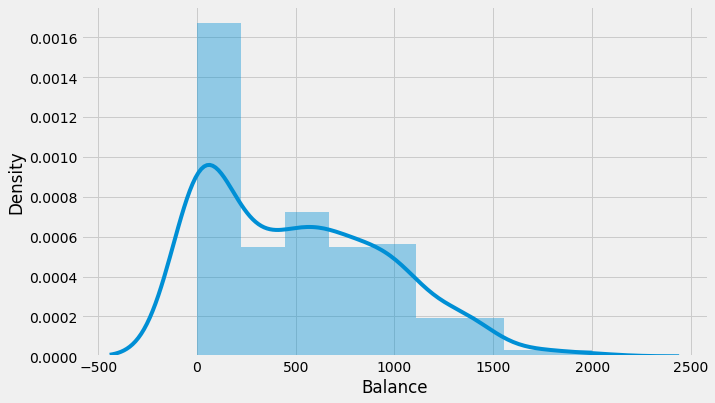

In [ ]:
sns.distplot(train['Balance'])
plt.show()

A scatter plot of credit limit vs. credit balance reveals that there is a nonlinear relatioship between these two variables. Furtheremore, there are several clients with a response value of zero.

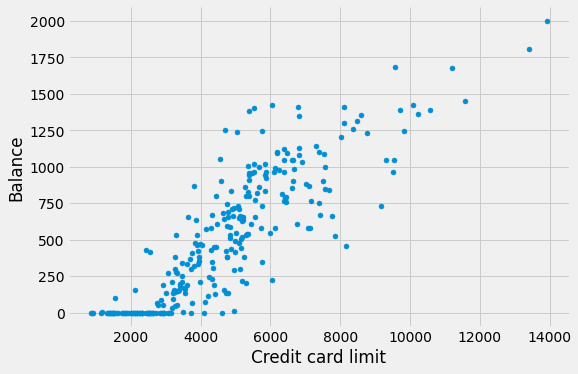

In [ ]:
fig, ax = plt.subplots(figsize=(8,5.5))
plt.scatter(train['Limit'], train['Balance'], s=25) # the s option is the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
sns.despine()
plt.show()

As you can guess, if we predict all responses in a straight line, we will run into a problem when predicting it for observations with a small limit.

The next cell illustrates how we can create a figure to explore the relationship between a quantitative variable and a variable with a reasonably small number of distinct values. 

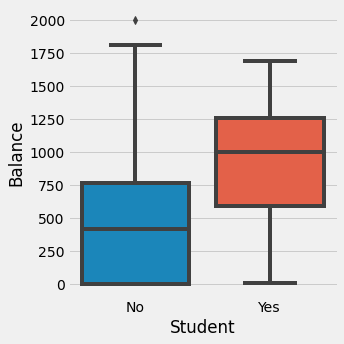

In [ ]:
#plt.rcParams['figure.figsize'] = (10, 6)
sns.catplot(data=train, x="Student", y="Balance",kind='box')
sns.despine()
plt.show()

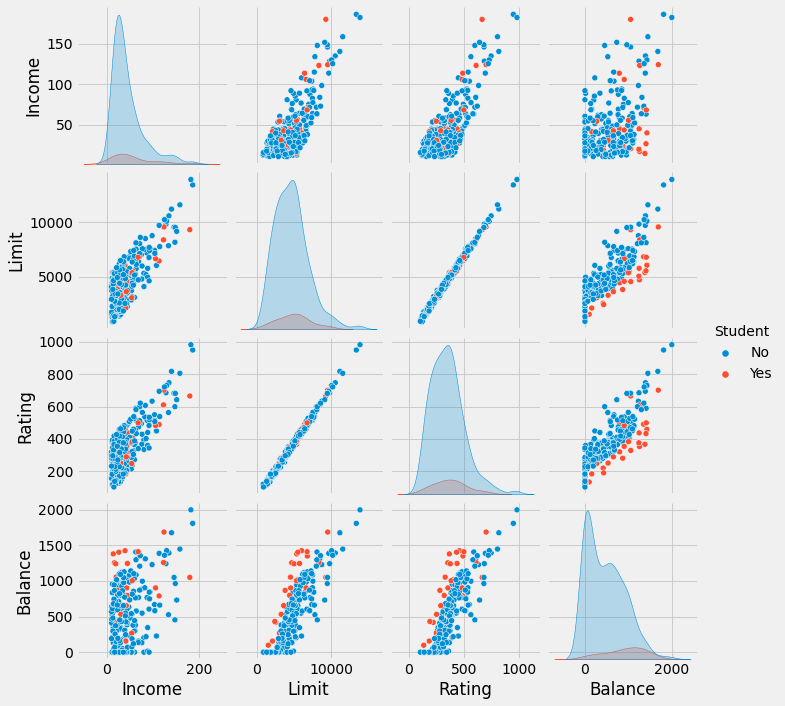

In [ ]:
sns.pairplot(train.loc[:,['Student','Income', 'Limit', 'Rating','Balance']],hue='Student',diag_kind='kde',height=2.5)

## Data Preparation

We need to identify and separate the response and the predictors. We will start with just one predictor: customer's credit card Limit. Then we will gradually add new features.

In [ ]:
# Construting response vector and design matrix (matrix of predictor values) 
response = 'Balance'
predictors = ['Limit',] # in general we will be working with a list of predictors, even though we only have one here

# If we wanted to use all available predictors, we would define predictors as follows: 
# predictors = [variable for variable in train.columns if variable!=response]

y_train = train[response] # selects the response variable
X_train=train[predictors].copy() # selects the variables in the predictor list

y_test = test[response]
X_test=test[predictors].copy()

## Linear Regression

Scikit-Learn library allows us to train and use a wide range of machine learning algorithms using a simple syntax structure: 

1. Import the method.<br>
2. Specify the model and options.
3. Train the model.
4. Use the estimated model to make predictions. 

We start with a basic method: linear regression. From here on we will use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank"><TT>LinearRegression</TT></a> function from Scikit-Learn the to train linear regression models. 

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

What will be the average balance of a person if his limit is 5000.

In [ ]:
ols.predict(pd.DataFrame(np.array([5000]),columns=['Limit']))

array([563.40720662])

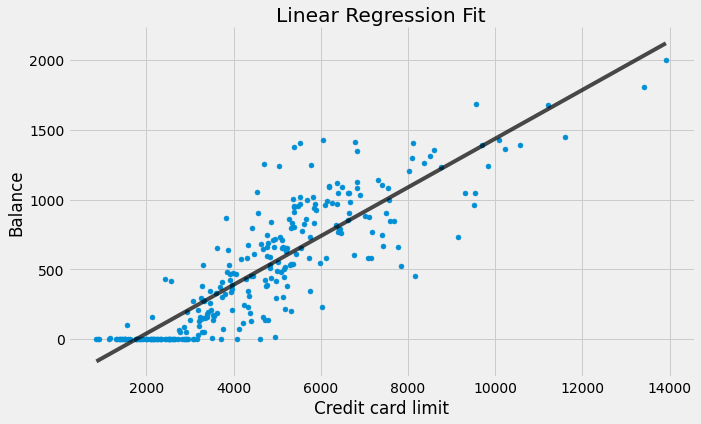

In [ ]:
# Here, we generate a grid of 500 values ranging from the minimum to the maximum value of the variable in the training data
# in reshape function -1 min means that we do not set this dimension.
# In our case, we say that we want to get a matrix with one column, and the number of rows should be calculated automatically.
x = np.linspace(X_train.min(), X_train.max(), 500).reshape((-1,1))

# Compute the predicted values for each of these input points
y_pred = ols.predict(x)

# Figure
fig, ax = plt.subplots()
ax.scatter(X_train.values, y_train.values, s=25) # the s option is the size of the dot
ax.set_title("Linear Regression Fit")
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
ax.plot(x, y_pred, color='black', alpha = 0.7)
sns.despine()
plt.show()

## K-Nearest Neighbours Regression

The previous figure suggests that the linear regression model may not be satisfactory for this data, since the relationship between limit and balance appears to be nonlinear. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank"><TT>K-Nearest Neighbours</TT></a> (KNN) method is a flexible algorithm that can approximate complex relationships between the response and predictors without assuming a particular form for the regression function.
    
Using the KNN method with Scikit-Learn follows the template from above. Unlike in the linear regression model, however, we need to specify a tuning parameter: the number of neighbours. 

KNN works very simply. For the observation we want to predict, we look for N nearest observations and average the value of the target at these points.
[viz](https://observablehq.com/@antoinebrl/knn-visualizing-the-variance)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10) # we should specify the number of neighbours
knn.fit(X_train, y_train)
knn.predict(np.array([5000]).reshape((-1,1)))

array([559.6])

Let's repeat the graph we made for the linear regression.

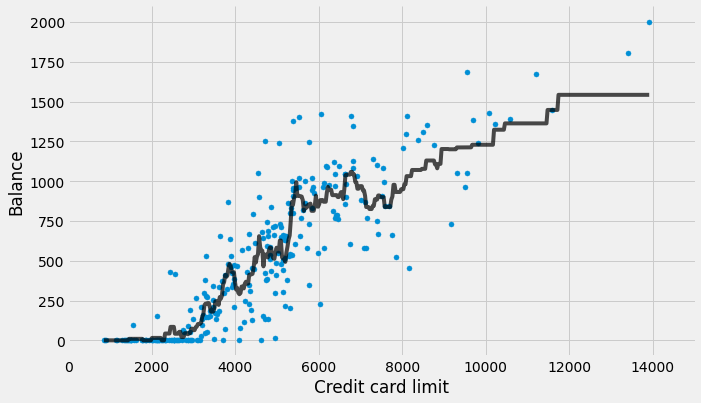

In [ ]:
# Generate a grid of 500 values ranging from the minimum to the maximum value of the variable in the training data
x = np.linspace(train['Limit'].min(),train['Limit'].max(), 500).reshape((-1,1))

# Compute the predicted values for each of these input points
y_pred = knn.predict(x)

# Plot figure
fig, ax = plt.subplots()
ax.scatter(X_train.values, y_train.values, s=25) # the s option is the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
ax.set_xlim(0, 15000)
ax.plot(x, y_pred, color='black', alpha = 0.7)
sns.despine()
plt.show()

We see that observations with a small limit have a much lower error rate. Let's see how the predictions change if we use other k.

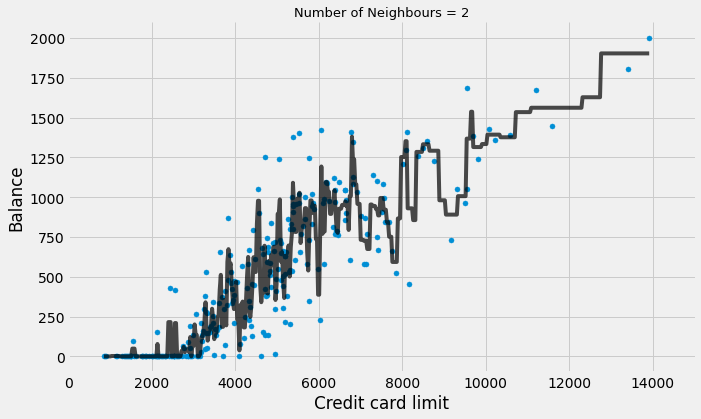

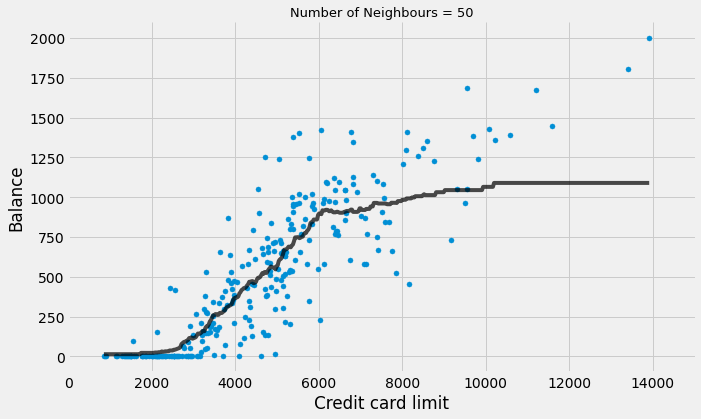

In [ ]:
for K in [2, 50]:
    
    # Specify and fit model
    knn = KNeighborsRegressor(n_neighbors=K) 
    knn.fit(X_train, y_train)

    # Compute the predicted values for each point in the grid
    y_pred = knn.predict(x)

    # Plot figuer
    fig, ax = plt.subplots()
    ax.scatter(X_train.values, y_train.values, s=25) 
    ax.set_title(f'Number of Neighbours = {K}', fontsize=13)
    ax.set_xlabel('Credit card limit')
    ax.set_ylabel('Balance')
    ax.set_xlim(0, 15000)
    ax.plot(x, y_pred, color='black', alpha = 0.7)
    sns.despine()
    plt.show()

**What would the model look like if k=number of observations?**

It's time to remember cross-validation and pick the optimal number of k.

We use [cross validation](http://scikit-learn.org/stable/modules/cross_validation.html) to estimate the generalisation performance of different model choices. For concreteness, we refer to choosing the parameter as tuning, and to the choice of the method as model selection.

To select the number of neighbours, we need to specify a grid of candidate values and select the specification with best cross validation performance. The Scikit-Learn [<TT>GridSearchCV</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) method conveniently automates this process. We will follow the template below.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor() 
    
tuning_parameters = {
    'n_neighbors': np.arange(1,51),
}

knn_search =  GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='neg_mean_squared_error')

Note that we specified the following options: 

<li style="margin-top: 12px;"><TT>cv=5</TT> specifies the number of folds. </li>

<li style="margin-top: 12px;"><TT>scoring = 'neg_mean_squared_error'</TT> specifies the evaluation criterion (it does not change the outcome here, but it is useful have this option as a template). </li>

<li style="margin-top: 12px;"><TT>return_train_score=False</TT> speeds up the computations by avoiding unnecessary calculations (this is set to become the default in future versions). </li>

<li style="margin-top: 12px;"><TT>n_jobs=4</TT> splits the task across four processor cores, speeding up the computations. </li>
<br><br>
We can access the following attribute to view the selected value of the parameter: 

In [ ]:
knn_search.best_params_

{'n_neighbors': 15}

In [ ]:
mean_test_score = knn_search.cv_results_['mean_test_score']
mean_test_score = np.sqrt(mean_test_score*-1)
neighbors_list = [x['n_neighbors'] for x in knn_search.cv_results_['params']]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x=neighbors_list, y=mean_test_score, labels={
                     "y": "Cross Validation RMSE",
                     "x": "Number of neighbours"
                 },
                 width=800).update_traces(mode='lines+markers')
fig.show()


## Model Selection

We now turn to model selection based on the cross-validation results. We use the [<TT>cross_val_predict</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function and show the CV results for two evaluation metrics. We could also apply the <TT>cross_val_score</TT> function to build this type of table, but this is slower when using multiple metrics. 

Here we see that KNN has a lower cross-validation error than OLS.  Note that the number of neighbours in KNN was selected earlier by the GridSearchCV method

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Re-specifying the two models
ols = LinearRegression()
knn = knn_search.best_estimator_

# Initialise table
columns=['RMSE', 'R-Squared']
rows=['Linear Regression', 'KNN']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# List of algorithms
methods = [ols, knn] 

# Computer cross-validation predictions and metrics
for i, method in enumerate(methods):
    y_pred = cross_val_predict(method, X_train, y_train, cv=5, n_jobs=4)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_train, y_pred))
    results.iloc[i, 1] = r2_score(y_train, y_pred)

results.round(2)

,RMSE,R-Squared
Linear Regression,228.98,0.74
KNN,223.52,0.76


## MARS

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-2tafq9sz
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-2tafq9sz
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp37-cp37m-linux_x86_64.whl size=3997259 sha256=a4d86a10cb70078d94cc928c5168fe43d8e0dc52a0d5fe1c7064a883d22a0414
  Stored in directory: /tmp/pip-ephem-wheel-cache-hur_ep_k/wheels/79/d7/aa/1e418a9aea84424ef2ce2697ae7cccace322976388d3692e8e
Successfully built sklearn-contrib-py-earth


In [ ]:
from pyearth import Earth

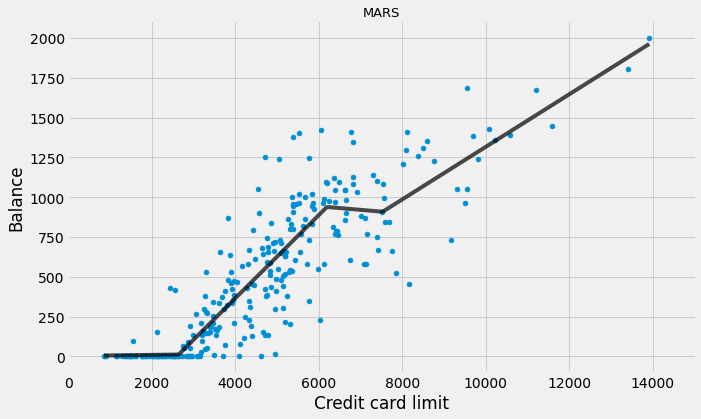

In [ ]:
X_train_plt=train['Limit'].copy() 
X_test_plt=test['Limit'].copy() 
mars = Earth()
mars.fit(X_train,y_train)

x = np.linspace(train['Limit'].min(),train['Limit'].max(), 280).reshape((-1,1))
pred_mars= mars.predict(x)

fig, ax = plt.subplots()
ax.scatter(X_train_plt.values, y_train.values, s=25) 
ax.set_title('MARS', fontsize=13)
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
ax.set_xlim(0, 15000)
ax.plot(x, pred_mars, color='black', alpha = 0.7)
sns.despine()
plt.show()

## Compare models
In this example we will use neptune.ai to store and compare models. There are many other tools that can be even better. For example [mlflow](https://mlflow.org) is a very popular open-source solution, but requires preparation to run in google colab, or for example [Weights & Biasis](https://wandb.ai/site).

In [ ]:
! pip install neptune-client -qqqq

     |████████████████████████████████| 433 kB 7.5 MB/s 
     |████████████████████████████████| 829 kB 47.0 MB/s 
     |████████████████████████████████| 1.9 MB 32.8 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 182 kB 50.8 MB/s 
     |████████████████████████████████| 132 kB 52.7 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 9.9 MB 6.4 MB/s 
     |████████████████████████████████| 140 kB 62.1 MB/s 
     |████████████████████████████████| 130 kB 39.8 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 127 kB 47.5 MB/s 
     |████████████████████████████████| 66 kB 4.0 MB/s 
     |████████████████████████████████| 4.1 MB 40.7 MB/s 
     |████████████████████████████████| 51 kB 5.0 MB/s 


In [ ]:
import neptune.new as neptune

Import creds for your account

In [ ]:
import yaml
with open('cred.yaml') as f:
    config = yaml.safe_load(f)

project_name = config['project']
api_token_ = config['api_token']

In [ ]:
run = neptune.init_run(
    project=project_name,
    api_token=api_token_,
    )

https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-6
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:
def log_exp(predictors,method,model_type,model_params,train=train,y_train=y_train):

  # init directory
  run = neptune.init_run(
    project=project_name,
    api_token=api_token_,
    )
  
  # select features
  X_train = train[predictors].copy()
  
  # estimate model
  y_pred = cross_val_predict(method, X_train, y_train, cv=5, n_jobs=4)
  rmse = np.sqrt(mean_squared_error(y_train, y_pred))
  r2 = r2_score(y_train, y_pred)
  
  # log artifacts
  run["evaluation/rmse"] = rmse
  run["evaluation/r2"] = r2
  run['model'] = model_type
  run['description'] = model_params
  run['features'] = predictors

  run.stop()


In [ ]:
train['Student'] = np.where(train['Student']=='Yes',1,0)
test['Student'] = np.where(test['Student']=='Yes',1,0)

In [ ]:
run.stop()

In [ ]:
# run ols with 2 features
log_exp(predictors = ['Limit','Income'],method = LinearRegression(),model_type='OLS',model_params='')

# run knn with 2 features. We should find best K
X_train = train[['Limit','Income']].copy()
tuning_parameters = {
    'n_neighbors': np.arange(1,51),
    'metric':['mahalanobis'],
    'metric_params':[{'V': X_train.cov()}]
}

knn_search =  GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train, y_train)

log_exp(predictors = ['Limit','Income'],method = knn_search.best_estimator_,model_type='KNN',model_params=str(knn_search.best_params_))

# run ols with 3 features
log_exp(predictors = ['Limit','Income','Student'],method = LinearRegression(),model_type='OLS',model_params='')

# run knn with 2 features. We should find best K
X_train = train[['Limit','Income','Student']].copy()
tuning_parameters = {
    'n_neighbors': np.arange(1,51),
    'metric':['mahalanobis'],
    'metric_params':[{'V': X_train.cov()}]
}

knn_search =  GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train, y_train)

log_exp(predictors = ['Limit','Income','Student'],method = knn_search.best_estimator_,model_type='KNN',model_params=str(knn_search.best_params_))


https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-13
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 13 operations to synchronize with Neptune. Do not kill this process.
All 13 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-13
https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-14
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 13 operations to synchronize with Neptune. Do not kill this process.
All 13 operations s

You can also add such artifacts as:

Model

```
run["model/pickled_model"].upload(File.as_pickle(ols))
```
Datasets 

```
run["data/Credit_data"].upload("Credit.csv")
```
and [other](https://docs.neptune.ai/usage/adding_tags/)




### Homework 
* Code cross-validation for MARS

## Evaluate on test data

In [ ]:
X_train = train[['Limit','Income','Student']].copy()
X_test = test[['Limit','Income','Student']].copy()
knn = KNeighborsRegressor(n_neighbors = 2, metric='mahalanobis', metric_params={'V': X_train.cov()}) 
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 77.68186993544032
R2: 0.9728632715182159


Now we can be sure that we did not get an overfitted model. But don't forget to keep track of the metrics in time!

## Regularization

### Feature selection

#### House Pricing Data 

We will use the data from [De Cock (2011)](http://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627), who compiled a detailed dataset of residential property sales in a North American city. It is used in one of the most popular practice [Kaggle competitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). This dataset is characterised by a large number of predictor variables (81, including categorical, discrete, and continuous variables). See the [documentation](https://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) for a description of the original variables. 

The original dataset has been cleaned and processed into a version that is ready for analysis. After coding the categorical predictors using dummy variables and creating some other relevant variables, the processed dataset has 195 predictors.  The processsed dataset is posted on Canvas.

In [ ]:
# Model selection and evaluation tools
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv(r'AmesHousing-Processed.csv')
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Age,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,LotArea,...,RoofMatl_Other,RoofStyle_Hip,RoofStyle_Other,ScreenPorchZero,WoodDeckSFZero,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,1656,0,0,50,639.0,0.0,441.0,0,528.0,31770,...,0,1,0,1,0,0,0,0,1,215000
1,896,0,0,49,468.0,144.0,270.0,0,730.0,11622,...,0,0,0,0,0,0,0,0,1,105000
2,1329,0,0,52,923.0,0.0,406.0,0,312.0,14267,...,0,1,0,1,0,0,0,0,1,172000
3,2110,0,0,42,1065.0,0.0,1045.0,0,522.0,11160,...,0,1,0,1,1,0,0,0,1,244000
4,928,701,0,13,791.0,0.0,137.0,0,482.0,13830,...,0,0,0,1,0,0,0,0,1,189900


We split the data into training and test sets.  Here we use a smaller training dataset (20%) in order to better illustrate the advantages of regularization. 

In [ ]:
response='SalePrice'
predictors=list(data.columns.values[:-1])

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.2, random_state=5)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()

y_train = train[response]
y_test = test[response]

X_train = train[predictors].copy()
X_test = test[predictors].copy()

With so many features, we can no longer use KNN. 

The “Curse of Dimensionality” is a tongue in cheek way of stating that there’s a ton of space in high-dimensional data sets. The size of the data space grows exponentially with the number of dimensions. This means that the size of your data set must also grow exponentially in order to keep the same density. If you don’t, then data points start getting farther and farther apart. 

It needs all points to be close along every axis in the data space. And each new axis added, by adding a new dimension, makes it harder and harder for two specific points to be close to each other in every axis.

To handle the curse of dimensionality you can use dimension reduction methods: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) or [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

## Exploratory Data Analysis

One can gain some insight on the distribution of the response by plotting a histogram. The response variable is right-skewed, hence we need to apply an appropriate transformation to reduce its skewness.

In [ ]:
y_train

1651     64500
1253    149900
1135    132000
819     147000
2149    142000
         ...  
1032    135000
2121     79900
1424    192000
1725    161000
2254    160500
Name: SalePrice, Length: 482, dtype: int64

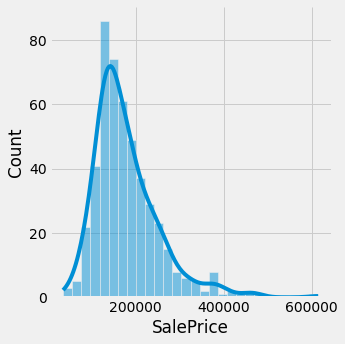

In [ ]:
sns.displot(data=train, x="SalePrice", kde=True)

Many of the numerical variables have a substantial number of zeros, since they refer to variables that do not apply to all houses (such as the second floor area). The dataset includes additional constructed dummy variables (such as <TT>2ndFlrSFZero</TT>, the indicator of whether the second floor area is zero) to account for this feature of the data.

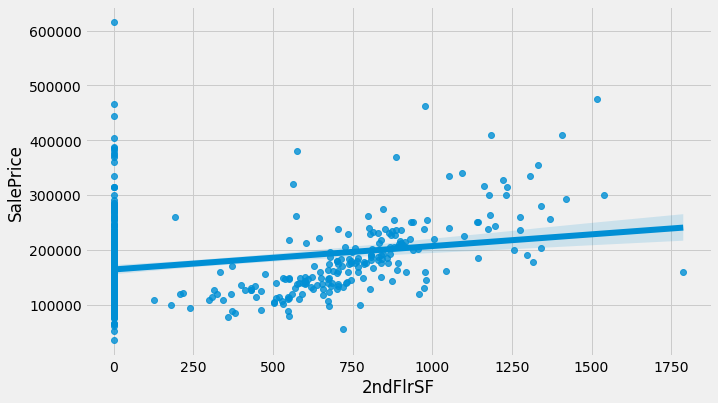

In [ ]:
sns.regplot(data=train,y='SalePrice',x='2ndFlrSF')

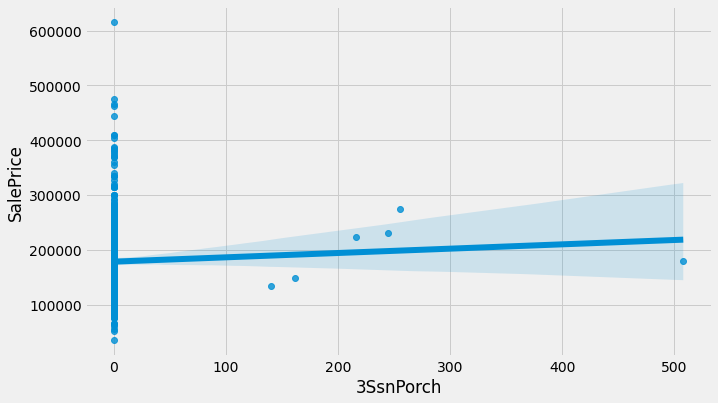

In [ ]:
sns.regplot(data=train,y='SalePrice',x='3SsnPorch')

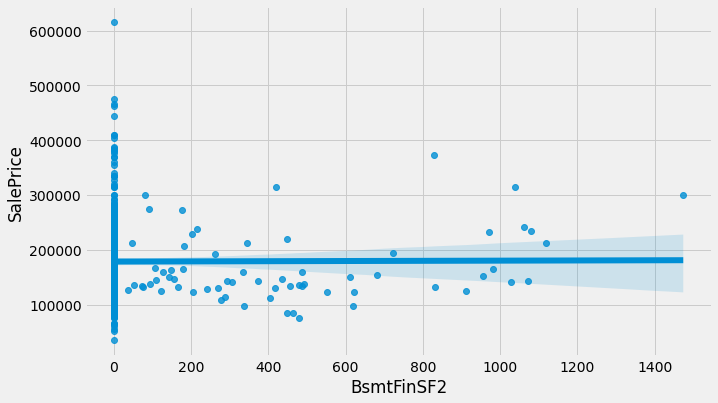

In [ ]:
sns.regplot(data=train,y='SalePrice',x='BsmtFinSF2')

## Response Transformation

The above histogram and scatterplots suggest that (i) the response variable is right skewed (ii) there are nonlinear relationships between the response and certain predictors (iii) the noise has non-constant variance as a function of the predictors. 

It is very common to observe these three patterns together in economic data, for reasons such as diminishing returns (additional space becomes less valuable if you have more space to begin with) and inflation (prices, salaries, etc, increase in percentage terms, not in a linear fashion).

In this situation, transforming the response will typically improve performance, as it is a parsimonious way to account for nonlinearities, reduce skewness, and make the noise variance near constant. The log transformation is the most common transformation of this type. 

In [ ]:
y_train = np.log(train[response])
y_test = np.log(test[response])

## Lasso and Ridge regressions


[For more details](https://academy.yandex.ru/handbook/ml/article/linear-models)

With so many features, we have a lot of insignificant features, but it is also very likely that we will face with multicolinearity.
It is also important to note that when several features are linearly dependent, the $\beta_i$ weights on them lose their physical meaning. It may even turn out that the weight of a features, with the growth of which the target, it would seem, should increase, becomes negative. This makes the model not only inaccurate, but also fundamentally uninterpretable. In general, inadequate signs or weights are a good indication of multicollinearity.

In order to solve this problem, the task is usually regularized, that is, an additional restriction on the vector of weights is added to it.

So for lasso regression the loss function is:


\begin{align}
        L1 \, loss = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 + \lambda*\sum_{i=2}^n |\beta_i|)
    \end{align}

And for ridge regression the loss function is:


\begin{align}
        L2 \, loss = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 + \lambda*\sum_{i=2}^n (\beta_i)^2
    \end{align}

Where $\lambda$ is a regularization factor that we can pick up. Here we also need a validation dataset. 

Note that the $\beta_0$ (intercept) is not regularized.

The l2-regulation works fine and is used in most cases, but there is one useful feature l1-regularization: its application leads to the fact that features that do not have a great influence on the response have a weight of 0 as a result of optimization. This allows you to conveniently remove features that have little effect on the target. In addition, it makes it possible to automatically get rid of the features that are involved in approximate linear dependence relations, thus saving the problems associated with multicollinearity,

## Scaling the Predictors

It is essential to scale the predictors before fitting regularised linear methods. Like several other machine learning algorithms, regularised linear methods do not perform well when predictors have very different scales (because the penalty term in the objective function treats all coefficients as comparable).  

The most common type of scaling is standardisation, where we transform each predictor by subtracting its sample average and diving the result by its standard deviation. The Scikit-Learn [<TT>StandardScaler</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) method makes it easy to process the data in this way.

We have two ways of implementing a workflow that includes scaling. The first is to use the standard scaler to preprocess the predictor matrix, and then work with the transformed data as usual. The second option is to use a Scikit-Learn [pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), which allows the user to combine transformations with a final estimator.

We start with the first option. The means and standard deviations used for standardizing are computed on the training data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We use a ridge regression to illustrate the process of fitting the model and computing predictions, without worrying about the details of the algorithm for now.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print(y_pred[0]) # we will get the result below

11.29827222406829


The other option is to use a Scikit-Learn pipeline, which allows the user to combine transformations with a final estimator.  Note that the results are exactly the same.

In [ ]:
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge()),
])

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(y_pred[0]) 

11.29827222406829


## Ridge Regression

We start with the Ridge regression method.  The [<TT>RidgeCV</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)  function is the most convenient implementation. We need to manually specify a grid of the penalty weight values (called alphas by the package).

Below, we present the code according to the two ways of handling predictor scaling. First, using preprocessing with the standard scaler.

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=5)

Now, using a pipeline. The results are the same as when using the standard scaler.

In [ ]:
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3...
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
                         cv=5))])

## Lasso

The process is similar for LASSO. We use the [<TT>LassoCV</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) class to fit and tune the lasso model. The reason for this class, as opposed to running a grid search on the [<TT>Lasso</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, is that there is an efficient algorithm for computing the path of solutions as we vary the lasso penalty weight parameter. The same is true for the other models. 

Again, we present the code according to the two ways of handling predictor scaling. First, using preprocessing with the standard scaler.

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5)

Now, using a pipeline. 

In [ ]:
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5)),
])

lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('estimator', LassoCV(cv=5))])

The lasso shrinks 88 coefficients to zero. 

In [ ]:
reg = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

88

## Elastic Net

We use the [<TT>ElasticNetCV</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV) class to fit the elastic net.   The procedure is similar to the ones used above, except that we need to specify a grid of values for the ElasticNet mixing parameter l1_ratio, which determines the weights placed on the lasso and ridge penalties.  For l1_ratio = 0 the penalty is just the L2 penalty. For l1_ratio = 1 it is just the L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

We present code according to the two ways of handling predictor scaling. First, using preprocessing with the standard scaler and then using the pipeline.

In [ ]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [ ]:
enet.l1_ratio_

0.99

In [ ]:
enet = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5, n_alphas=200)),
])

enet.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 ElasticNetCV(cv=5,
                              l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                        0.8, 0.9, 0.99],
                              n_alphas=200))])

In [ ]:
reg = enet._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

87

## Model Evaluation

We compute the test results for the price on the original scale.

As a technical detail, recall that we should make a bias correction when predicting the original response based on a model for a transformed response (see the slides in Lecture 2 on estimating the conditional expectation in models with a log transformation of the response). However, the adjustment is very small for the current example (see further below), and so we ignore it in the next cell for simplicity. 

In [ ]:
columns=['Test RMSE', 'Test R2']
rows=[ 'Ridge', 'Lasso', 'Elastic Net']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ridge, lasso, enet]

for i, method in enumerate(methods):
    
    y_pred=method.predict(X_test)
    results.iloc[i,0] = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    results.iloc[i,1] = r2_score(np.exp(y_test), np.exp(y_pred))

results.round(3)

,Test RMSE,Test R2
Ridge,21780.871,0.901
Lasso,21064.675,0.907
Elastic Net,21057.507,0.907


### Homework

Compare the results if we use ordinary linear regression and select features only by p-value.

## Shapley values


In the case of linear regression, we usually have no problem with interpretation. But more complex models work like a black box and now we will look at a universal approach to model interpretation. We look at how the prediction and error change for different combinations of features. We cannot remove the feature completely and when we want to measure the quality of the model without it, we just replace the values with random ones. Another advantage of this approach over simple regression coefficients is that we can learn the effect of a trait in each particular prediction. For example, it can be useful when we want to know why we got an outlier.

In [ ]:
!pip install shap --q

     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap

In [ ]:
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

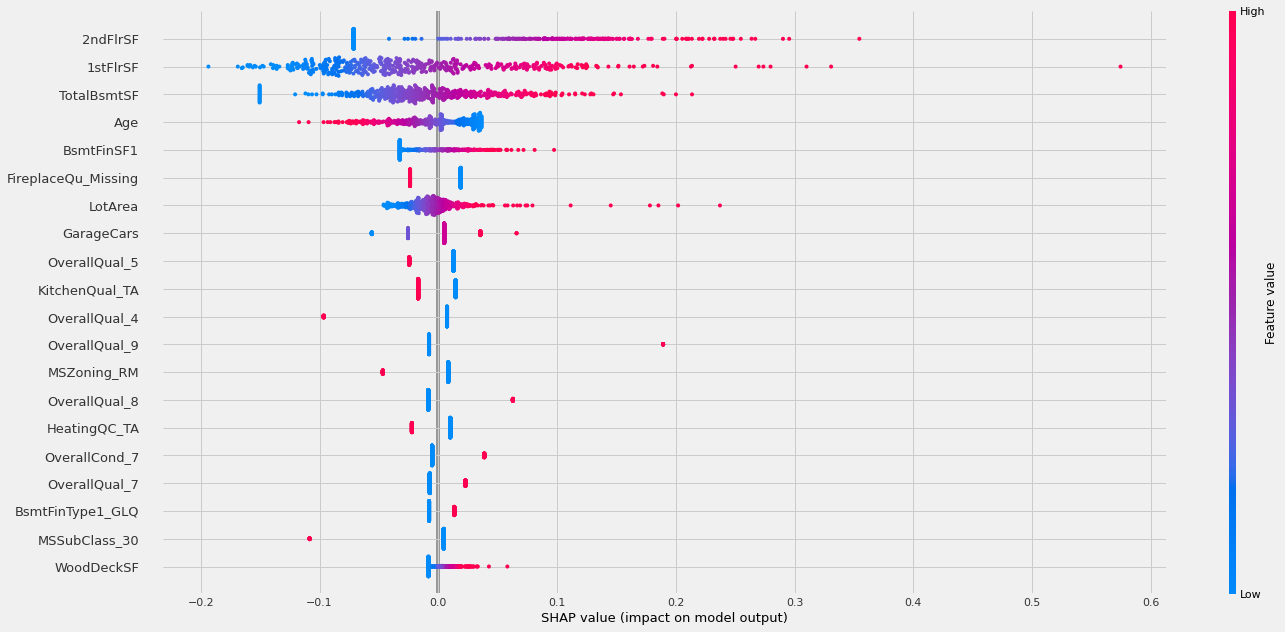

In [ ]:
shap.initjs()
explainer = shap.LinearExplainer(enet,X_train_scaled, feature_names=X_train.columns)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values,X_train_scaled, plot_size=(20,9),feature_names=X_train.columns)

In [ ]:
shap.initjs()
obs = 0
explainer = shap.LinearExplainer(enet,X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

best = np.argsort(shap_values[obs,:])[len(shap_values[obs,:])-3:len(shap_values[obs,:])]
worst = np.argsort(shap_values[obs,:])[0:3]
shap_col = np.concatenate((worst,best))

shap.force_plot(explainer.expected_value, shap_values[obs,shap_col], X_test_scaled[obs][shap_col],feature_names=X_train.iloc[:,shap_col].columns,matplotlib=False)

In [ ]:
shap.initjs()
obs = 500
explainer = shap.LinearExplainer(enet,X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

best = np.argsort(shap_values[obs,:])[len(shap_values[obs,:])-3:len(shap_values[obs,:])]
worst = np.argsort(shap_values[obs,:])[0:3]
shap_col = np.concatenate((worst,best))

shap.force_plot(explainer.expected_value, shap_values[obs,shap_col], X_test_scaled[obs][shap_col],feature_names=X_train.iloc[:,shap_col].columns,matplotlib=False)

In [ ]:
np.exp(12.3)

219695.9886721379

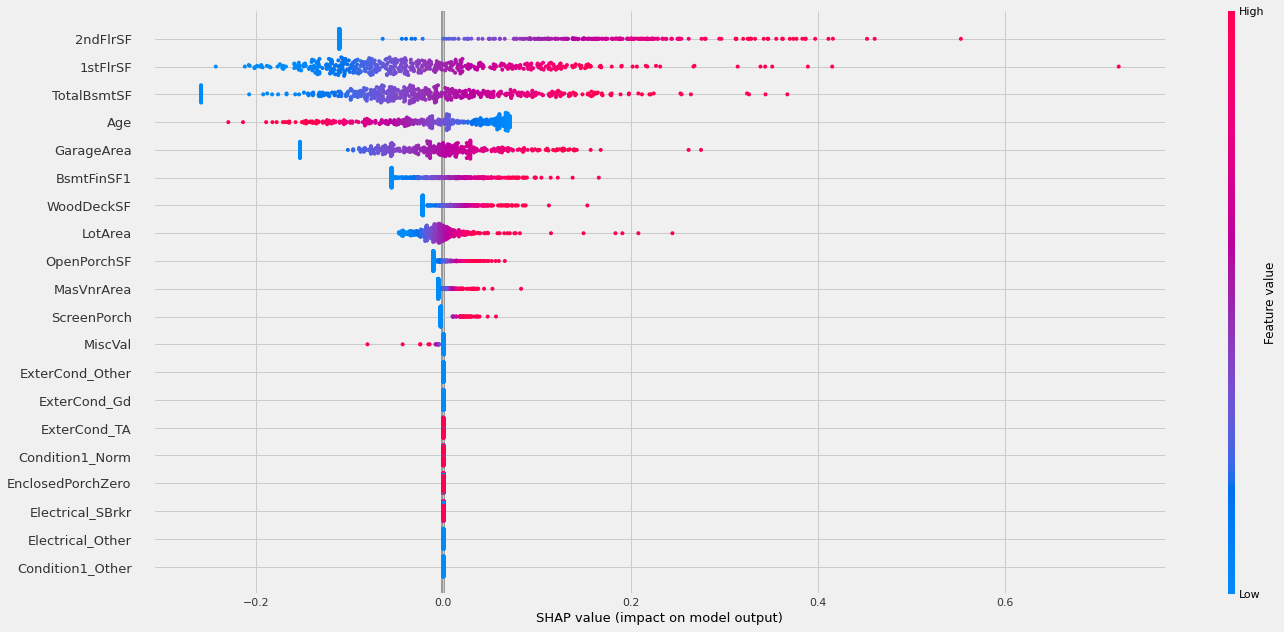

In [ ]:
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(X_train, y_train)
shap.initjs()
explainer = shap.LinearExplainer(enet,X_train, feature_names=X_train.columns)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train, plot_size=(20,9),feature_names=X_train.columns)

In [ ]:
shap.initjs()
obs = 0
explainer = shap.LinearExplainer(enet,X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[obs,:], X_test.loc[obs,:],feature_names=X_train.columns)

In [ ]:
shap.initjs()
obs = 500
explainer = shap.LinearExplainer(enet,X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[obs,:], X_test.loc[obs,:],feature_names=X_train.columns)

As you can see, our achievements cannot be called amazing. To better work with cause and effect, you can use asymmetric SHAP values, but unfortunately there is no stable implementation in python, but you can use R.

[About difference between SHAP and asymmetric SHAP](https://www.youtube.com/watch?v=7d13f4UaAn0)